## 此样例是将摄氏度与华氏度进行转换，使用tensorflow2.0建立一个不含隐藏层的神经网络（输入层一个神经元、输出层一个神经元）
* 转换公式：
> f = c * 1.8 + 32

In [42]:
import tensorflow as tf
import numpy as np

给定数据

In [43]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

## 创建模型
首先创建一个尽可能简单的模型，此模型只有输入层和输出层
### 建立一层神经元
相当于输入层已经有了，只建立输出层。使用``tf.keras.layers.Dense``建立l0层，此方法的两个参数为：
* ``input_shape=[1]`` 表示此层输入的维度。
* ``units=1`` 表示此层中神经元的数量，应该与下一层的``input_shape``相同

In [62]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### 将层集成（堆叠）到模型Model中
将定义好的不同层依次加入``tf.keras.Sequential``中

In [63]:
model = tf.keras.Sequential([l0])

也可以先建立``tf.keras.Sequential``，再将``layers``加入到``Sequential``中

In [35]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

### 使用loss以及optimizer编译模型
使用``model.complie``进行编译，传入``loss``以及``oprimizer``参数

In [64]:
model.compile(loss='mean_squared_error',
             optimizer=tf.keras.optimizers.Adam(0.1))

### 训练模型
使用``model.fit``训练模型
第一个参数是输入，第二个参数是想要得到的输出，``epochs``参数表示要进行多少次训练，``verbose``参数控制输出
``verbose``不同参数对应结果：
* 0: 不在标准输出流输出日志信息
* 1: 输出进度条记录
> Train on 7 samples
> 
> Epoch 1/500
> 
> 7/7 [==============================] - 0s 5ms/sample - loss: 1638.4735
> 
> Epoch 2/500
> 
> 7/7 [==============================] - 0s 285us/sample - loss: 1515.6560
> 
> ......
* 2: 每个epoch输出一行记录
> Train on 7 samples
> 
> Epoch 1/500
> 
> 7/7 - 0s - loss: 1750.9865
> 
> Epoch 2/500
> 
> 7/7 - 0s - loss: 1618.1188
> 
> ......
* 3或其他数字: 输出每个epoch
> Train on 7 samples
> 
> Epoch 1/500
> 
> Epoch 2/500
> 
> ......

In [67]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=0)
print('Finished training the model')

Finished training the model


``model.fit``返回的是一个``tensorflow.python.keras.callbacks.History``对象，我们可以用这个对象得到每训练一个epoch后loss的变化情况

In [17]:
type(history)

tensorflow.python.keras.callbacks.History

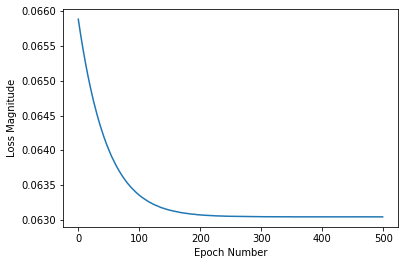

In [68]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

## 使用模型进行预测
使用``model.predict``进行预测，由于网络的输入维度是1，因此输入的数组的维度应该是(?, 1)

In [39]:
x_pre = np.array([100, 150, 200]).reshape(3, 1)
print(model.predict(x_pre))

[[211.31833]
 [302.48038]
 [393.64246]]


## 查看参数

In [40]:
print('These are the layer variables: {}'.format(l0.get_weights()))

These are the layer variables: [array([[1.8075123]], dtype=float32), array([30.818178], dtype=float32)]


In [41]:
history.history

{'loss': [3385.931640625,
  3151.503662109375,
  2928.816650390625,
  2718.052734375,
  2519.363037109375,
  2332.854736328125,
  2158.591552734375,
  1996.590087890625,
  1846.8121337890625,
  1709.1632080078125,
  1583.488037109375,
  1469.5673828125,
  1367.1163330078125,
  1275.7823486328125,
  1195.1446533203125,
  1124.7159423828125,
  1063.9442138671875,
  1012.2176513671875,
  968.8704833984375,
  933.1906127929688,
  904.4298706054688,
  881.8146362304688,
  864.5588989257812,
  851.8772583007812,
  842.9993286132812,
  837.1827392578125,
  833.7266845703125,
  831.9835815429688,
  831.3681640625,
  831.3651733398438,
  831.5353393554688,
  831.5166015625,
  831.02490234375,
  829.8507690429688,
  827.85546875,
  824.9639892578125,
  821.1577758789062,
  816.4656372070312,
  810.9549560546875,
  804.7225952148438,
  797.8856811523438,
  790.5738525390625,
  782.9210815429688,
  775.0596313476562,
  767.1145629882812,
  759.1990966796875,
  751.4114379882812,
  743.833068847656